0.6 0 1
0.6 12 13
1.4 1 2
1.4 13 14
0.6 2 3
0.6 14 15
1.4 3 4
1.4 15 16
0.6 4 5
0.6 16 17
1.4 5 6
1.4 17 18
0.6 6 7
0.6 18 19
1.4 7 8
1.4 19 20
0.6 8 9
0.6 20 21
1.4 9 10
1.4 21 22
0.6 10 11
0.6 22 23
0.8 1 13
0.8 2 14
0.8 5 17
0.8 6 18
0.8 9 21
0.8 10 22
Sorted eigenvalues (first 12 of L=24):
[-2.484351 -2.393405 -2.315859 -1.679374 -1.573117 -1.451095 -1.216193
 -0.859238 -0.782115 -0.469618 -0.163731 -0.138829]


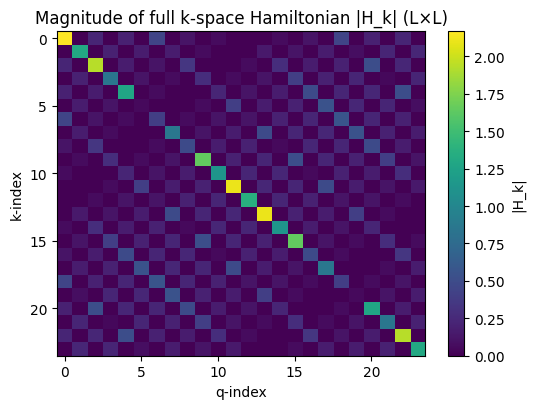

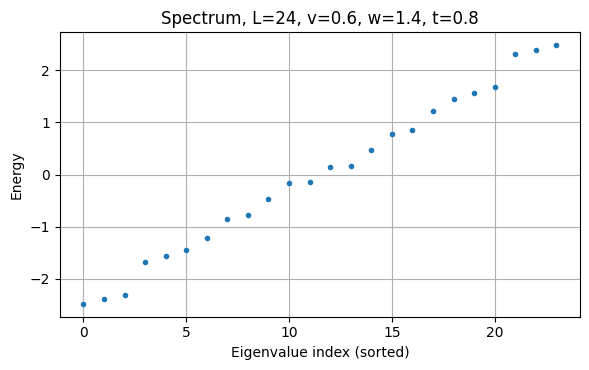

In [15]:
# Re-run the code cell to build and diagonalize the L×L k-space Hamiltonian for the SSH ladder.

import numpy as np
import matplotlib.pyplot as plt

def build_real_space_H(L, v, w, t):
    assert L % 4 == 0, "L must be a multiple of 4"
    H = np.zeros((L, L), dtype=complex)
    def add_hop(i, j, amp):
        print(amp, i, j)
        H[i, j] -= amp
        H[j, i] -= np.conjugate(amp)

    # v and w terms
    for j in range(L//2-1):
        if j % 2 == 0:
            add_hop(j, j+1, v)
            add_hop(j+L//2, j+1+L//2, v)
        else:
            add_hop(j, j+1, w) 
            add_hop(j+L//2, j+1+L//2, w)

    # t rungs
    for j in range(L // 8): 
        add_hop(4*j+1, L//2 + 4*j+1, t)
        add_hop(4*j+2, L//2 + 4*j+2, t)
    return H

def fourier_matrix(L):
    m = np.arange(L)
    k = 2*np.pi*m/L
    n = np.arange(L)[:, None]
    F = np.exp(1j * n * k) / np.sqrt(L)
    return F, k

def k_space_hamiltonian(L, v, w, t):
    H_real = build_real_space_H(L, v, w, t)
    F, k = fourier_matrix(L)
    Hk = F.conj().T @ H_real @ F
    return Hk, k, H_real

# Example
L, v, w, t = 24, 0.6, 1.4, 0.8
Hk, kgrid, Hreal = k_space_hamiltonian(L, v, w, t)

evals_k, evecs_k = np.linalg.eigh(Hk)
evals_k_sorted = np.sort(np.real_if_close(evals_k))

print("Sorted eigenvalues (first 12 of L=24):")
print(np.round(evals_k_sorted[:12], 6))

# Visualize |H_k| block structure
import matplotlib.pyplot as plt
plt.figure(figsize=(5.5,4.2))
plt.imshow(np.abs(Hk), aspect='auto')
plt.colorbar(label='|H_k|')
plt.title('Magnitude of full k-space Hamiltonian |H_k| (L×L)')
plt.xlabel('q-index')
plt.ylabel('k-index')
plt.tight_layout()
plt.show()

# Spectrum plot (all eigenvalues)
plt.figure(figsize=(6,3.8))
plt.plot(np.arange(L), evals_k_sorted, marker='.', ls='')
plt.xlabel('Eigenvalue index (sorted)')
plt.ylabel('Energy')
plt.title(f'Spectrum, L={L}, v={v}, w={w}, t={t}')
plt.grid(True)
plt.tight_layout()
plt.show()


0.6 0 1
0.6 12 13
1.4 1 2
1.4 13 14
0.6 2 3
0.6 14 15
1.4 3 4
1.4 15 16
0.6 4 5
0.6 16 17
1.4 5 6
1.4 17 18
0.6 6 7
0.6 18 19
1.4 7 8
1.4 19 20
0.6 8 9
0.6 20 21
1.4 9 10
1.4 21 22
0.6 10 11
0.6 22 23
0.8 1 13
0.8 2 14
0.8 5 17
0.8 6 18
0.8 9 21
0.8 10 22


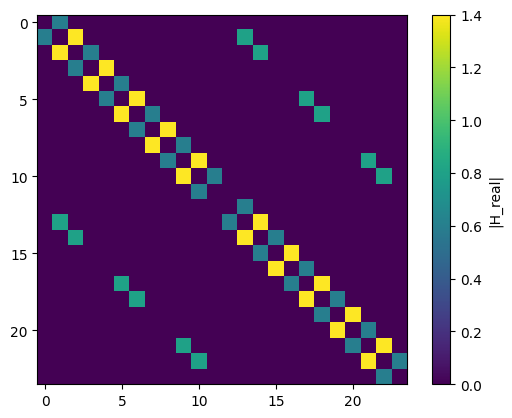

In [16]:
plt.imshow(np.abs(build_real_space_H(L, v, w, t)))
plt.colorbar(label='|H_real|')

In [51]:
F, k = fourier_matrix(10)

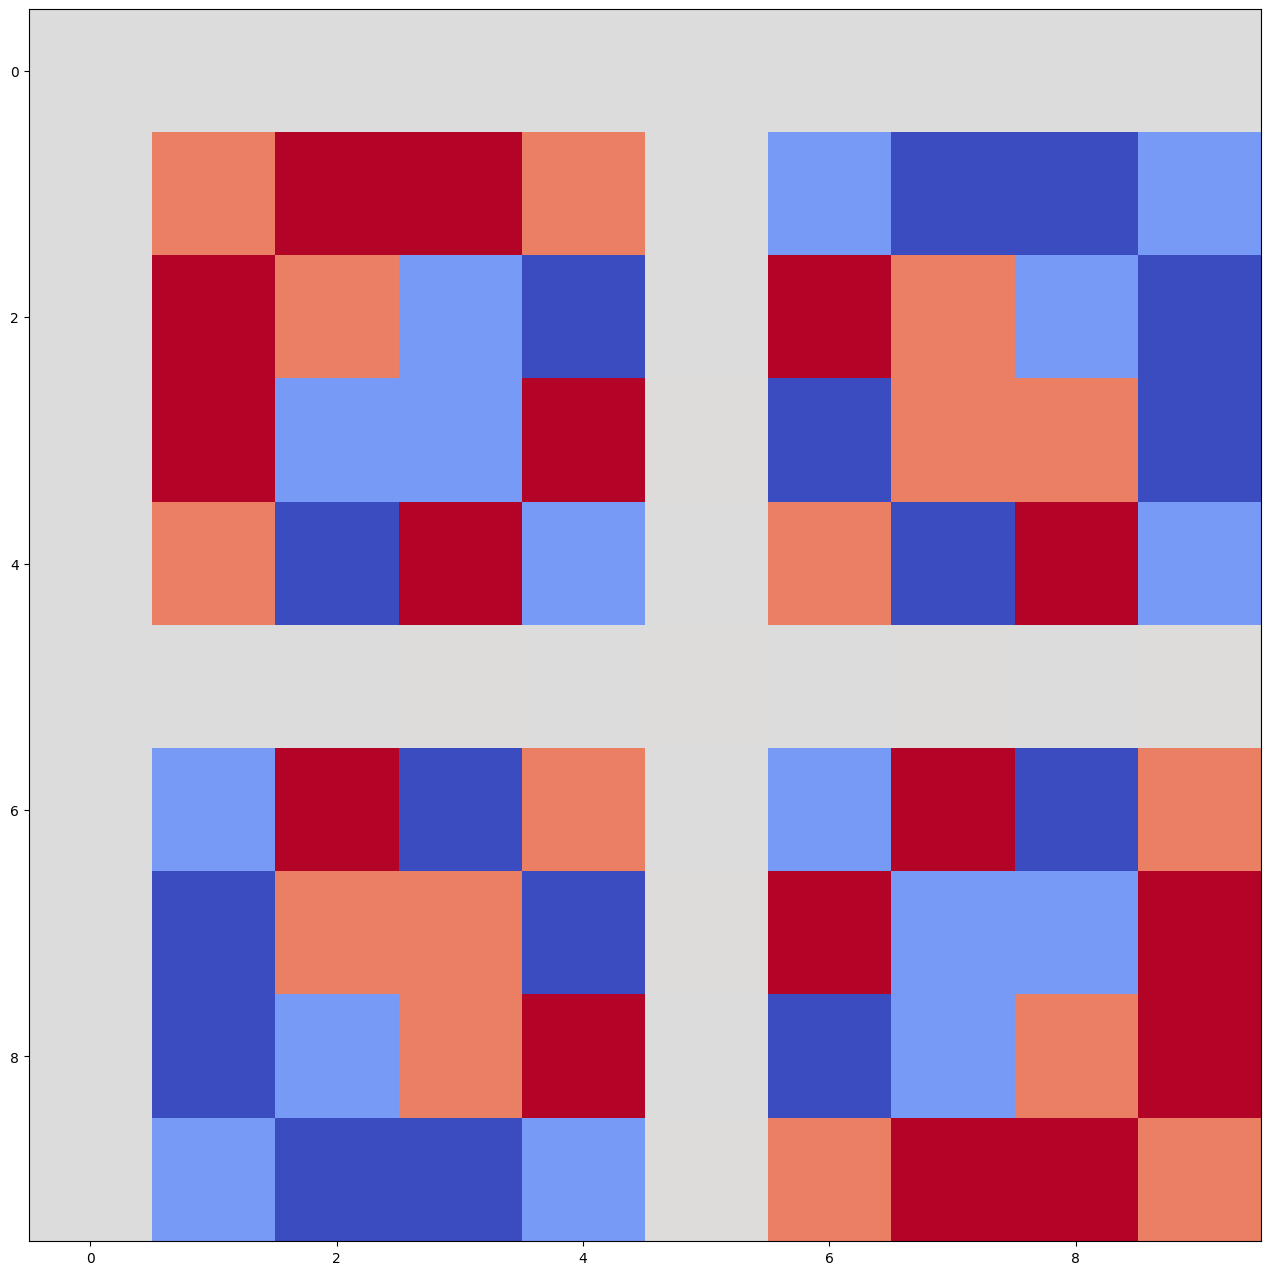

In [53]:
plt.figure(figsize=(16,16))
plt.imshow(np.imag(F), cmap='coolwarm') #, interpolation='spline36')